## Load and Explore Data

In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Training size ", df_train.shape)
print("Test size ", df_test.shape)

Training size  (42000, 785)
Test size  (28000, 784)


In [4]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


## Data Preparation and Visualization

In [5]:
X = df_train.drop(['label'], axis=1)
y = df_train['label']

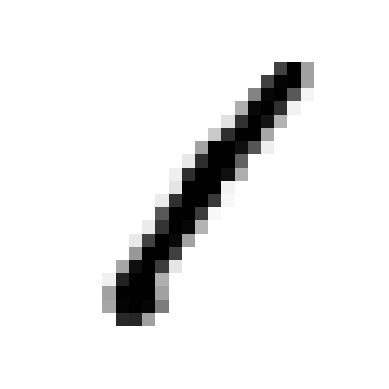

In [6]:
import matplotlib.pyplot as plt

# Visualizing the first image
imagen = X.iloc[0]
plt.imshow(imagen.to_numpy().reshape(28,28), cmap='binary')
plt.axis('off')
plt.show()

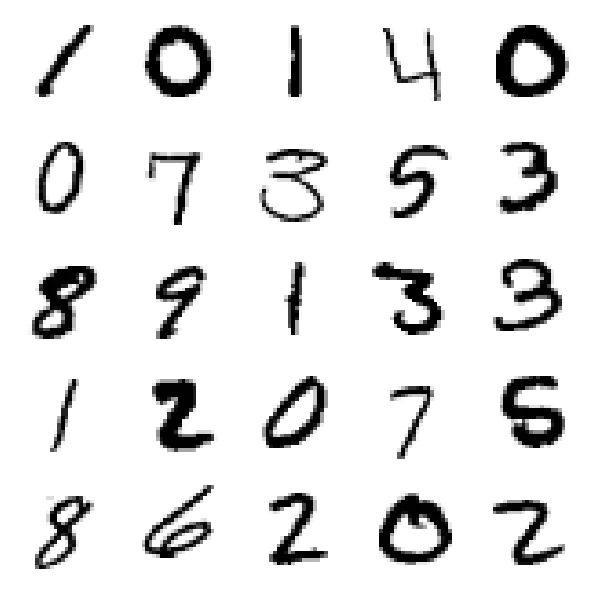

In [7]:
plt.figure(figsize=(6,6))
for digito in range(0,25):
    plt.subplot(5,5,digito+1)
    grid = X.iloc[digito].to_numpy().reshape(28,28)
    plt.imshow(grid, interpolation='none', cmap='binary')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

In [8]:
# Normalize the data
X = X.values.reshape(-1, 28, 28, 1)

In [9]:
X = X/255.0

In [10]:
df_test = df_test.values.reshape(-1, 28, 28, 1)
df_test = df_test/255.0

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model Creation and Training

In [12]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

def build_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(32, (3,3))) # reduced from 64 to 32
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(32)) # reduced from 64 to 32
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5)) # Dropout
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics='accuracy',
    )
    return model

# wrap the model with KerasClassifier
model = KerasClassifier(build_model, verbose=0)

# define the hyperparameters for the search
parameters = {'batch_size': [32], # just trying with batch size 32
              'epochs': [10],     # just trying with 10 epochs
              'optimizer': ['adam', 'rmsprop']} # just trying with 'adam' optimizer

# perform grid search
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=2)

# defining EarlyStopping callback
es_callback = EarlyStopping(monitor='val_loss', patience=3)

grid_search = grid_search.fit(X_train, y_train, callbacks=[es_callback])
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best parameters: ", best_parameters)
print("Best precision: ", best_accuracy)

cv_results = pd.DataFrame(grid_search.cv_results_)
print(cv_results)

Best parameters:  {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
Best precision:  0.9857671957671958
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      36.745716      8.193304         1.448979        0.069646   
1      28.695513      1.228436         1.474393        0.059404   

  param_batch_size param_epochs param_optimizer  \
0               32           10            adam   
1               32           10         rmsprop   

                                              params  split0_test_score  \
0  {'batch_size': 32, 'epochs': 10, 'optimizer': ...           0.985820   
1  {'batch_size': 32, 'epochs': 10, 'optimizer': ...           0.985767   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.985714         0.985767        0.000053                1  
1           0.985714         0.985741        0.000026                2  


## Model Evaluation

In [14]:
best_model = grid_search.best_estimator_.model_
predictions = best_model.predict(df_test)

875/875 [==============================] - 2s 2ms/step


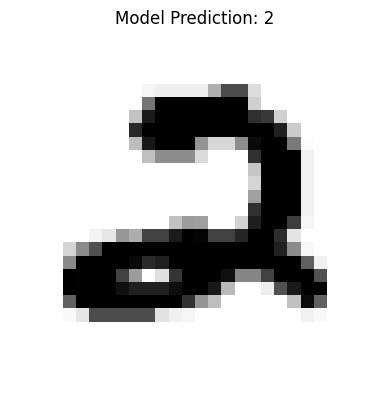

In [15]:
predicted_classes = np.argmax(predictions, axis=1)

position = 0
plt.imshow(df_test[position].reshape(28,28), cmap='binary')
plt.title('Model Prediction: {}'.format(predicted_classes[position]))
plt.axis('off')
plt.show()

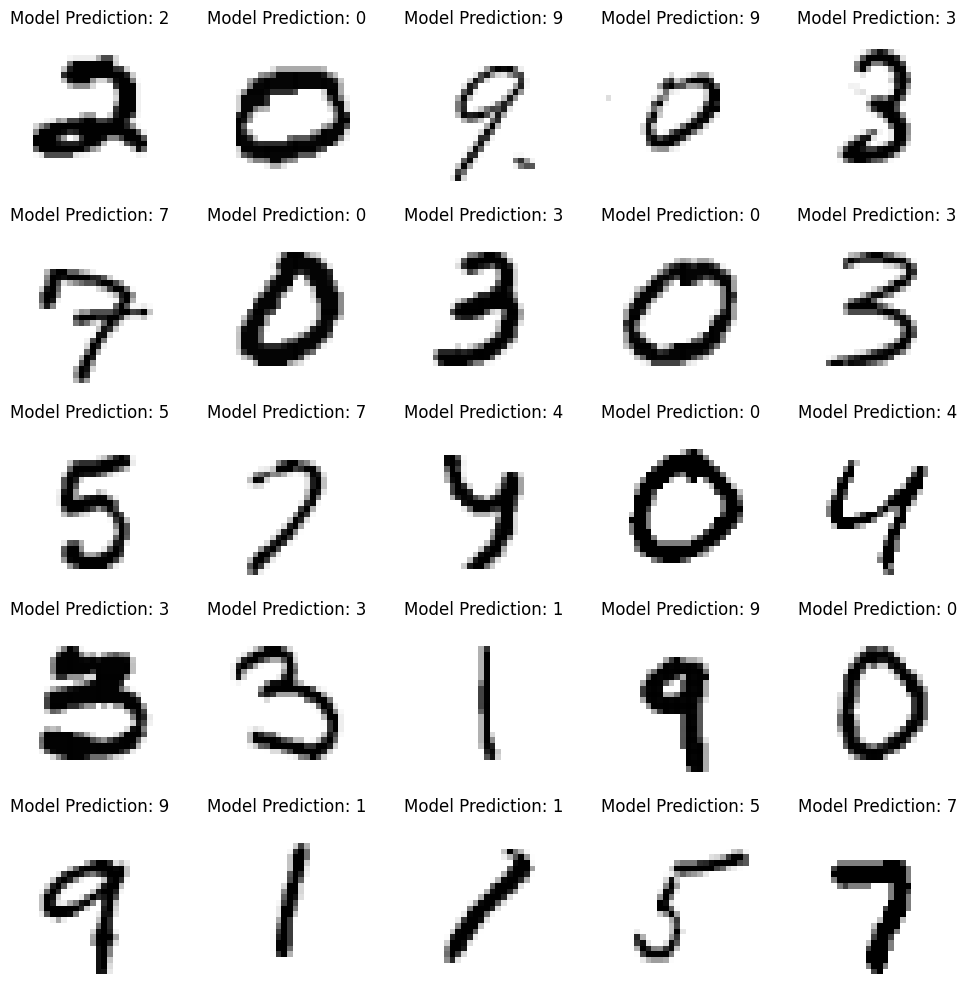

In [16]:
n = 25
square = int(np.sqrt(n))
plt.figure(figsize=(10,10))

for i in range(n):
  plt.subplot(square, square, i+1)
  plt.imshow(df_test[i].reshape(28,28), cmap='binary')
  plt.title('Model Prediction: {}'.format(predicted_classes[i]))
  plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print('Model Prediction is: ', test_acc)
print('Model Loss is: ', test_loss)

132/132 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9881
Model Prediction is:  0.988095223903656
Model Loss is:  0.03334645926952362


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Genera predicciones
y_pred = np.argmax(best_model.predict(X_test), axis=-1)

132/132 [==============================] - 0s 3ms/step


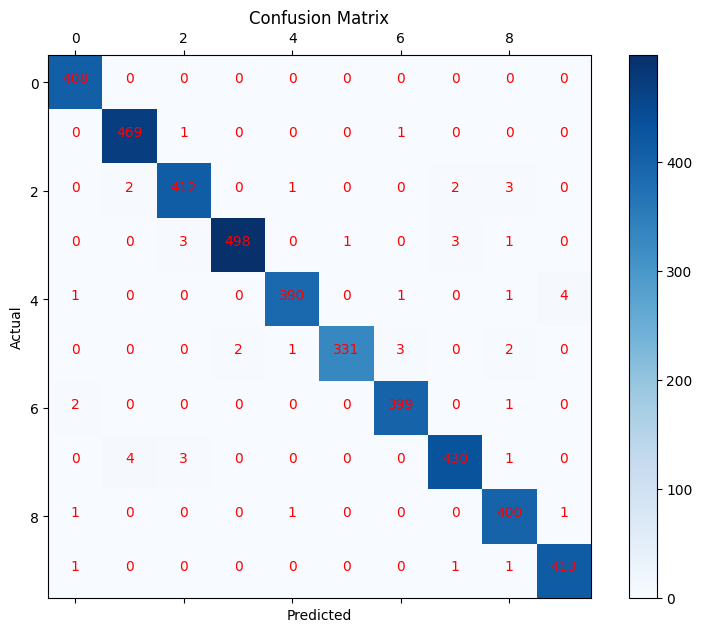

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, conf_mat[i, j],
                 horizontalalignment='center',
                 color='red')

plt.show()

In [20]:
lb = LabelBinarizer()
lb.fit(y_test)

y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)

roc_auc_score(y_test, y_pred, multi_class='ovr')

0.9933023218325747

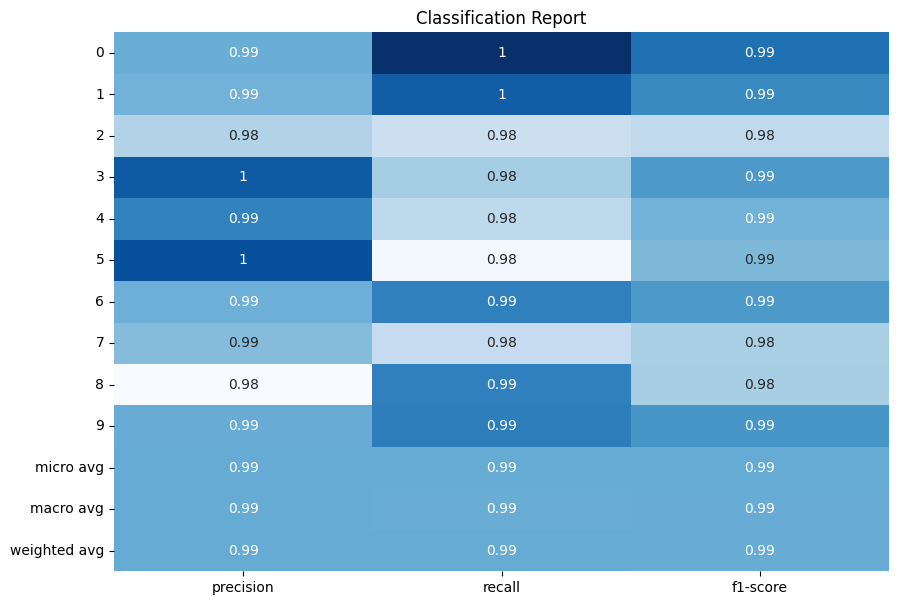

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to dataframe
report_df = pd.DataFrame(report).transpose()

# Visualize the classification report
plt.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Blues, cbar=False)
plt.title('Classification Report')
plt.show()

## Save the model

In [22]:
best_model.save('best_model.h5')